In [72]:
using Plots
using Distributions
using SpecialFunctions
using Random
using DataFrames


In [2]:
# Détermination des paramètres de la loi de Weibull

lambda = 1.5
k = 2.0
mu = lambda * gamma(1 + 1/k)

println("La moyenne théorique de la distribution de Weibull est : ", mu)

La moyenne théorique de la distribution de Weibull est : 1.329340388179137


In [147]:
# Fonction qui calcule la médiane des moyennes

function median_of_means_opt(X)
    alpha=0.025
    n = length(X)
    k = abs(trunc(Int, 8 * log(1 / alpha)))
    m = div(n, k)
    means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
    return median(means)
end

median_of_means_opt (generic function with 2 methods)

In [148]:
# Fonction qui calcule la médiane des moyennes pour différentes valeurs de c avec k=c*log(1/alpha)

function median_of_means_opt_C(X)
    
    alpha=0.025
    medians = []
    for c in 1:40
        n = length(X)
        k = abs(trunc(Int, c * log(1 / alpha)))
        m = div(n, k)
        means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
        push!(medians, median(means))
    end
    return medians
end

median_of_means_opt_C (generic function with 2 methods)

In [150]:
#Fonction qui calcule la médiane des moyennes pour différentes valeurs de alpha

function median_of_meanAlpha(X)
    medians = Float64[]  
    alphas = 0.001:0.001:0.1  
    tolerance = 1e-10  
    for alpha in alphas
        n = length(X)
        if alpha > tolerance
            k = abs(trunc(Int, 8 * log(1 / alpha)))
            m = div(n, k)
            means = [mean(X[((i-1)*m+1):min(i*m, n)]) for i in 1:k]
            push!(medians, median(means))
        else
            push!(medians, NaN)
        end
    end
    return  alphas,medians  # Retourner également le vecteur d'alphas
end

median_of_meanAlpha (generic function with 1 method)

In [151]:
# Creation des données qui être utilisées pour les tests

# Loi exponentielle
# Moyenne théorique = 0.1
data1 = rand(Exponential(0.1), 10000)

#Loi de Pareto
#Moyenne théorique =3
data2 = rand(Pareto(1.5, 1.0),10000)

# Loi de Weibull

data3 = rand(Weibull(1.5, 2.0),10000)

10000-element Vector{Float64}:
 1.1545547585614915
 1.330550680246543
 1.7123606358568775
 1.9113859312508659
 1.030380219463541
 0.13360007824836276
 2.4946922850655335
 2.0964616059601564
 0.9911726669064121
 1.3921452076925183
 ⋮
 1.9894880528200156
 1.4753460329982953
 3.632597547996702
 0.9939611466718025
 1.2468053002918433
 5.2029539958018525
 2.6038777949964222
 2.167177035281133
 3.467551786704857

In [133]:
# Test de la médiane des moyennes pour la loi exponentielle

median_of_means_opt(data1)
println("La médiane des moyennes pour la loi exponentielle est : ", median_of_means_opt(data1))

# Test de la médiane des moyennes en fonction de c pour la loi exponentielle

median_of_means_optC(data1)
println("La médiane des moyennes pour la loi exponentielle en fonction de c est : ", median_of_means_optC(data1))

# Test de la médiane des moyennes en fonction de alpha pour la loi exponentielle

median_of_meanAlpha(data1)
println("La médiane des moyennes pour la loi exponentielle en fonction de alpha est : ", median_of_meanAlpha(data1))

In [134]:
# Test de la médiane des moyennes pour la loi de Pareto

median_of_means_opt(data2)
println("La médiane des moyennes pour la loi de Pareto est : ", median_of_means_opt(data2))

# Test de la médiane des moyennes en fonction de c pour la loi de Pareto
median_of_means_optC(data2)
println("La médiane des moyennes pour la loi de Pareto en fonction de c est : ", median_of_means_optC(data2))

# Test de la médiane des moyennes en fonction de alpha pour la loi de Pareto
median_of_meanAlpha(data2)
println("La médiane des moyennes pour la loi de Pareto en fonction de alpha est : ", median_of_meanAlpha(data2))



In [135]:
# Test de la médiane des moyennes pour la loi de Weibull

median_of_means_opt(data3)
println("La médiane des moyennes pour la loi de Weibull est : ", median_of_means_opt(data3))

# Test de la médiane des moyennes en fonction de c pour la loi de Weibull   
median_of_means_optC(data3)
println("La médiane des moyennes pour la loi de Weibull en fonction de c est : ", median_of_means_optC(data3))

# Test de la médiane des moyennes en fonction de alpha pour la loi de Weibull
median_of_meanAlpha(data3)
println("La médiane des moyennes pour la loi de Weibull en fonction de alpha est : ", median_of_meanAlpha(data3))

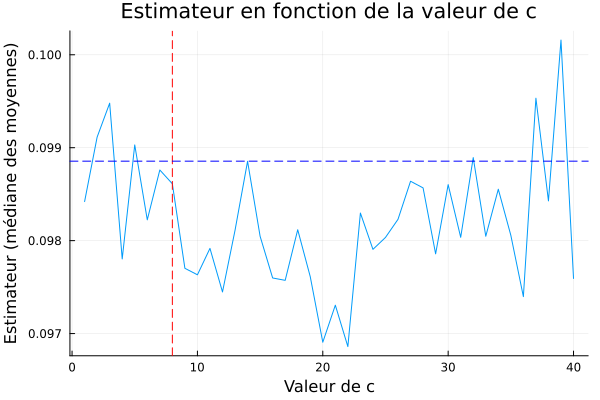

In [120]:
# Plot d'une loi exponentielle de paramètre 0.1

# Tracer le graphique
plot(1:40, median_of_means_opt_C(data1), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data1)
hline!([mean(data1)], color=:blue, linestyle=:dash, label="y = mean(data1)")


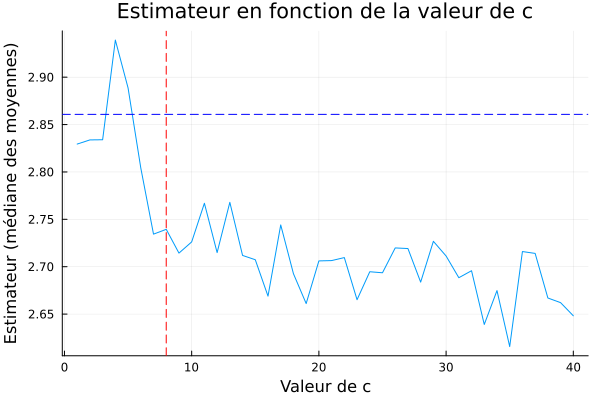

In [136]:
#Plot d'une loi de Pareto de paramètres 1.5 et 1
# Tracer le graphique
plot(1:40, median_of_means_opt_C(data2), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
    title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data2)
hline!([mean(data2)], color=:blue, linestyle=:dash, label="y = mean(data2)")

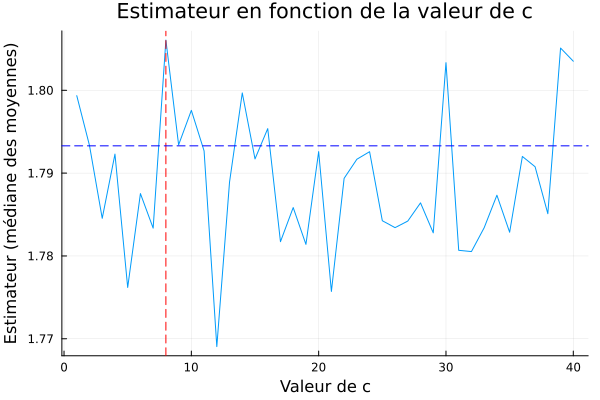

In [146]:
# Plot d'une loi de Weibull

# Tracer le graphique
plot(1:40, median_of_means_opt_C(data3), xlabel="Valeur de c", ylabel="Estimateur (médiane des moyennes)", 
    title="Estimateur en fonction de la valeur de c", legend=false)

# Ajout de la droite verticale à x = 8  
vline!([8], color=:red, linestyle=:dash, label="x = 8")

# Ajout de la droite horizontale à y = mean(data3)
hline!([mean(data3)],color=:blue, linestyle=:dash, label="y = mean(data3)")

In [145]:
#Fonction qui compare la médiane des moyennes (avec le sample) et la moyenne empirique pour différentes tailles d'échantillons

function simulate_means_and_mom(k, m_range, dist)
    ns = k .* m_range
    x_bar = Float64[] 
    mom = Float64[] 

    for n in ns
        x = rand(dist, n)
        push!(x_bar, mean(x))
        push!(mom, median_of_means_opt(x, 0.025))
    end
    plot(ns, mom, label="Median of Means")
    plot!(ns, x_bar, label="Empirical Mean", title="Empirical Mean vs Median of Means", xlabel="Sample Size", ylabel="Mean")
    
end

simulate_means_and_mom (generic function with 1 method)

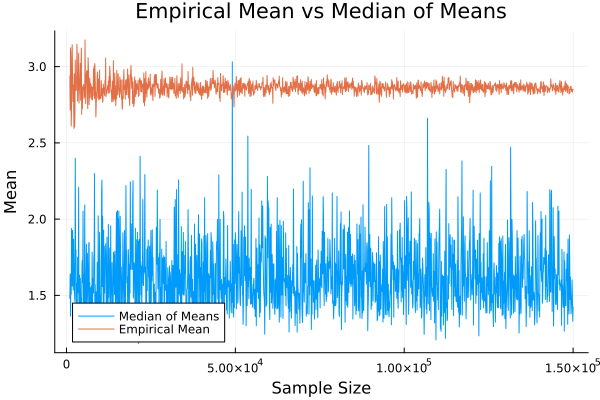

In [144]:
simulate_means_and_mom(100, 10:1500, data2)

La moyenne empirique semble un meilleur estimateur que la median of mean...